# Data Science Salary Prediction with TensorFlow in different Data Encoder

TensorFlow offers multiple levels of abstraction so you can choose the right one for your needs. Build and train models by using the high-level Keras API, which makes getting started with TensorFlow and machine learning easy.

In this Notebook, I explore the data and I can see that there are many categorical features so I use 2 encoder techniques and use TensorFlow to predict the salary.

I can realize that data preprocessing is very important.


### Data Science Job Salaries Dataset contains 11 columns, each are:

1. work_year: The year the salary was paid.
2. experience_level: The experience level in the job during the year
3. employment_type: The type of employment for the role
4. job_title: The role worked in during the year.
5. salary: The total gross salary amount paid.
6. salary_currency: The currency of the salary paid as an ISO 4217 currency code.
7. salaryinusd: The salary in USD
8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. remote_ratio: The overall amount of work done remotely
10. company_location: The country of the employer's main office or contracting branch
11. company_size: The median number of people that worked for the company during the year

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
@import url("https://fonts.googleapis.com/css2?family=Oswald&family=Roboto:ital,wght@0,500;0,900;1,500&display=swap");
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1 {
    display: inline-block;
    text-align: center;
    padding: 30px;
    margin: 0;
    background: linear-gradient(0deg, blue, green 40%, red);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    width: 90%;
    font-family: Oswald;
    border-radius: 5px;
}

h2 {
    display: inline-block;
    text-align: center;
    padding: 25px;
    margin: 0;
    background: linear-gradient(0deg, blue, green 40%, red);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    width: 90%;
    font-family: Oswald;
    border-radius: 5px;
}

h3 {
    display: inline-block;
    text-align: center;
    padding: 20px;
    margin: 0;
    background: linear-gradient(0deg, blue, green 40%, red);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    width: 90%;
    font-family: Oswald;
    border-radius: 5px;
}


body, p, ul, li {
    font-family: Oswald;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: Oswald;
    font-size: 20px;
    background: linear-gradient(to right, #30CFD0 0%, #121FCF 100%);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
}
</style>
""")

In [2]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.1 MB/s eta 0:00:00


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-salaries-2023/ds_salaries.csv


In [4]:
import tensorflow as tf
print(tf.__version__)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

2.12.0


In [5]:
df = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [6]:
df_eda = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")

In [7]:
def summary(df):
    print(f"Dataset has {df.shape[1]} features and {df.shape[0]} examples.")
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

summary(df_eda)

Dataset has 11 features and 3755 examples.


,Unique,Missing,Duplicated,Types
work_year,4,0,1171,int64
experience_level,4,0,1171,object
employment_type,4,0,1171,object
job_title,93,0,1171,object
salary,815,0,1171,int64
salary_currency,20,0,1171,object
salary_in_usd,1035,0,1171,int64
employee_residence,78,0,1171,object
remote_ratio,3,0,1171,int64
company_location,72,0,1171,object


#### The most interesting, Maximum Salary

Staff Data Scientist is the Job title who earn the maximum salary (in this dataset). He has the SE (Senior Level) experience level. Surprisingly, the employment type is not full time, it is the part time and he works as remote 100%. Since salary is the total gross salary amount paid so it looks quite high.

In [8]:
df_eda.max()

work_year                             2023
experience_level                        SE
employment_type                         PT
job_title             Staff Data Scientist
salary                            30400000
salary_currency                        USD
salary_in_usd                       450000
employee_residence                      VN
remote_ratio                           100
company_location                        VN
company_size                             S
dtype: object

#### There are many tech startup
This data show that there are many people work with the company medium size.

In [9]:
import plotly.express as px 

# plotting the pie chart
fig = px.pie(df_eda, title="comapny_size", names="company_size") 
  
# showing the plot
fig.show()

In [10]:
import plotly.express as px 

# plotting the pie chart
fig = px.pie(df_eda, title="work_year", names="work_year") 
  
# showing the plot
fig.show()

#### The Majority of Job Title is Data Engineer
The second job title is Data Scientist and then Data Analyst.

In [11]:
import plotly.express as px 

# plotting the pie chart
fig = px.pie(df_eda, title="job_title", names="job_title") 
  
# showing the plot
fig.show()

#### The paid salary for Year 2023 is the top and for Senior Level

<Axes: xlabel='experience_level', ylabel='count'>

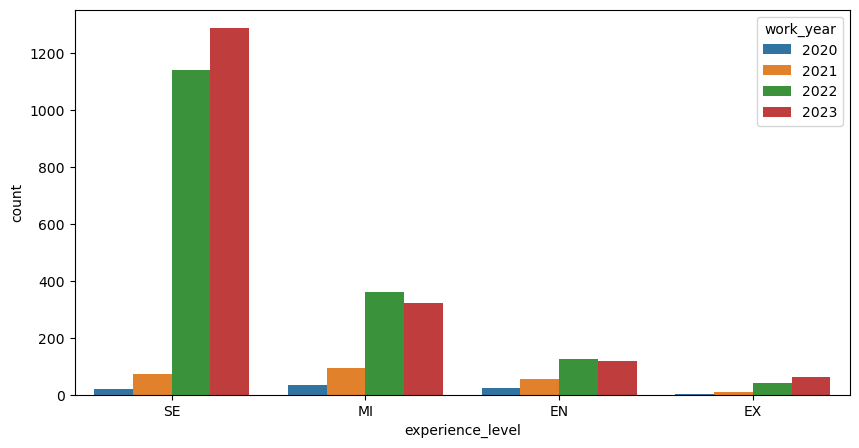

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_eda, x="experience_level", hue="work_year")

In [13]:
plt.style.use('seaborn-v0_8')

# Prediction, using OneHotEncoder and MinMaxScaler Preprocessing

In [14]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["salary"]),
    (OneHotEncoder(handle_unknown="ignore"), ["work_year", "experience_level", "employment_type", "job_title", "salary_currency", "employee_residence", "remote_ratio", "company_location", "company_size"])
)

# Create X, y
X = df.drop(["salary_in_usd"], axis=1)
y = df["salary_in_usd"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to training data
ct.fit(X_train)

# Transform training and test data with normalization and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [15]:
X_train_normal

<3004x265 sparse matrix of type '<class 'numpy.float64'>'
	with 30039 stored elements in Compressed Sparse Row format>

In [16]:
X_train.shape, X_train_normal.shape

((3004, 10), (3004, 265))

In [17]:
X_train_normal = X_train_normal.toarray()
X_test_normal = X_test_normal.toarray()

## Create, compile, and train the model

In [18]:
# Set seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1),
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model
history = model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 138048.6875 - mae: 138048.6875
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 137975.2500 - mae: 137975.2500
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 137703.1094 - mae: 137703.1094
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 137084.6406 - mae: 137084.6406
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 135970.8125 - mae: 135970.8125
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 134217.7969 - mae: 134217.7969
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 131719.7344 - mae: 131719.7344
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 128395.7578 - mae: 128395.7578
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 124181.4531 - mae: 124181.4531
Epoch 10/100
94/94 [==============================] - 0s 2ms/ste

<Axes: >

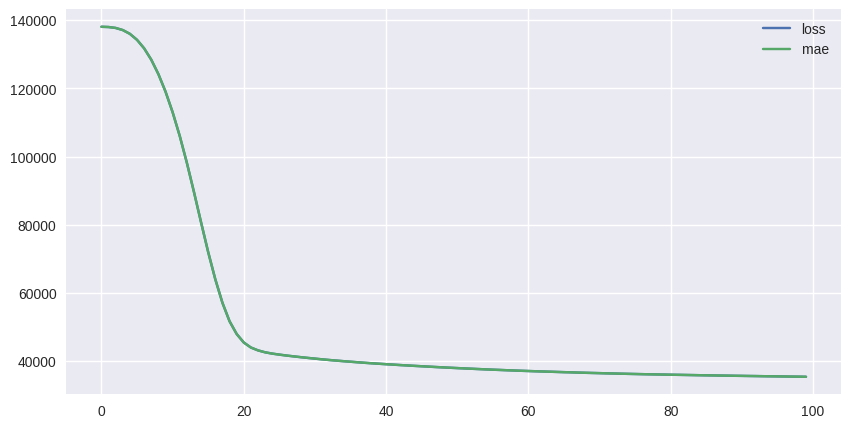

In [19]:
# Plot loss curves
pd.DataFrame(history.history).plot(figsize=(10,5))

In [20]:
model.evaluate(X_test_normal, y_test)

24/24 [==============================] - 0s 1ms/step - loss: 36564.7656 - mae: 36564.7656


[36564.765625, 36564.765625]

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               26600     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 27,621
Trainable params: 27,621
Non-trainable params: 0
_________________________________________________________________


In [22]:
prediction = model.predict(X_test_normal)

24/24 [==============================] - 0s 1ms/step


#### Use Ravel to 1-dimensional array
Since I will use the prediction to plot

In [23]:
prediction = np.ravel(prediction)

#### Plot the prediction result

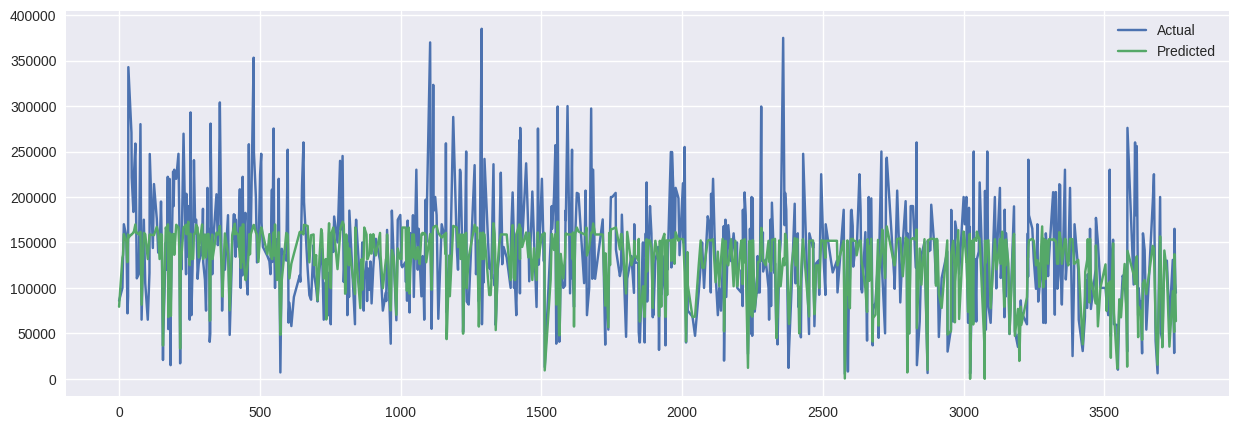

In [24]:
# Prepare data to plot
df_final = pd.DataFrame({"Y_test": y_test , "Pred" : prediction})

# Sort index before plot
df_final = df_final.sort_index()

# plot the result
plt.figure(figsize= (15,5))
plt.plot(df_final)
plt.legend(["Actual" , "Predicted"])

# Prediction, using LabelEncoder Preprocessing

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Transform data using LabelEncoder
cols = ['experience_level', 'employment_type', 'job_title','salary_currency','employee_residence','company_location','company_size']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)

# Create X, y
X_label = df.drop(["salary_in_usd"], axis=1)
y_label = df["salary_in_usd"]

# Build train and test sets
X_label_train, X_label_test, y_label_train, y_label_test = train_test_split(X_label, y_label, test_size=0.33, random_state=42)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           3755 non-null   int64
 1   experience_level    3755 non-null   int64
 2   employment_type     3755 non-null   int64
 3   job_title           3755 non-null   int64
 4   salary              3755 non-null   int64
 5   salary_currency     3755 non-null   int64
 6   salary_in_usd       3755 non-null   int64
 7   employee_residence  3755 non-null   int64
 8   remote_ratio        3755 non-null   int64
 9   company_location    3755 non-null   int64
 10  company_size        3755 non-null   int64
dtypes: int64(11)
memory usage: 322.8 KB


## Create, compile, and train the model

In [27]:
# Set seed
tf.random.set_seed(42)

# Create a model
model_label = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1),
])

# Compile the model
model_label.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model
history_label = model_label.fit(X_label_train, y_label_train, epochs=100)

Epoch 1/100
79/79 [==============================] - 1s 2ms/step - loss: 115458.9297 - mae: 115458.9297
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 71852.0703 - mae: 71852.0703
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 58791.8828 - mae: 58791.8828
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 58529.2070 - mae: 58529.2070
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 59252.8398 - mae: 59252.8398
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 58701.8242 - mae: 58701.8242
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 58598.7617 - mae: 58598.7617
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 58267.5703 - mae: 58267.5703
Epoch 9/100
79/79 [==============================] - 0s 2ms/step - loss: 58769.8203 - mae: 58769.8203
Epoch 10/100
79/79 [==============================] - 0s 2ms/step - loss: 58574.

<Axes: >

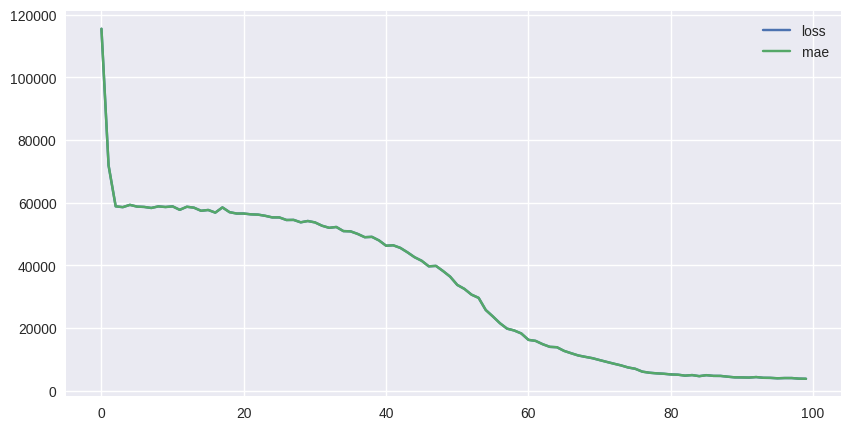

In [28]:
# Plot loss curves
pd.DataFrame(history_label.history).plot(figsize=(10,5))

#### Making Prediction

In [29]:
Label_pred = model_label.predict(X_label_test)

39/39 [==============================] - 0s 1ms/step


#### Convert to a 1-dimensional array

I have to convert the prediction to a 1-dimensional array to calculate any metrics.<br>
Using ravel() function from Numpy:

In [30]:
Label_pred = np.ravel(Label_pred)

#### Plot the prediction result

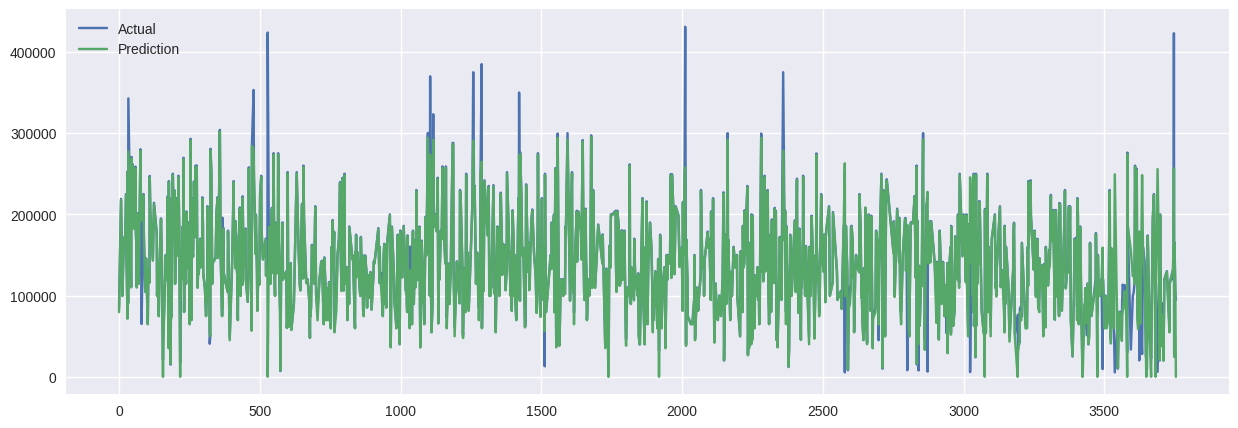

In [31]:
# Prepare data for plot
df_label = pd.DataFrame({"Y_test": y_label_test , "Prediction" : Label_pred})

# Sort index before plot
df_label = df_label.sort_index()

# Plot the final result
plt.figure(figsize= (15,5))
plt.plot(df_label)
plt.legend(["Actual" , "Prediction"])

# Conclusion

Data preprocessing is very important. There are some technique to encode the features.<br>
In this case, I use TensorFlow for the same data but different Encoding technique.

Using LabelEncoder helps to decrease loss and mae then I can get the great final result.🎉🎉🎉